<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

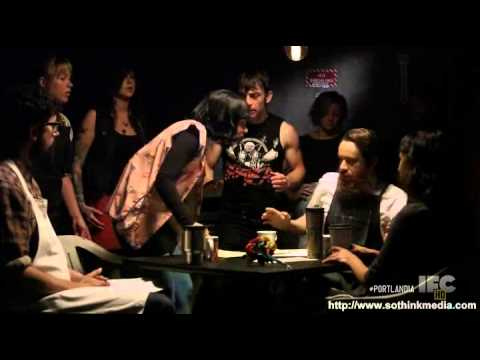

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
import pandas as pd

shops = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
shops['rating'] = shops['star_rating'].apply(lambda x: x.replace(
    ' star rating', '')).astype('float')
del shops['star_rating']

In [4]:
shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops['full_review_text'] = shops['full_review_text'].apply(
    lambda x: " ".join(x.split()[1:]))

In [5]:
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [6]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [7]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

In [8]:
shops['tokens'] = shops['full_review_text'].apply(get_lemmas)

In [9]:
shops['tokens']

0       [1, check, love, love, love, atmosphere, corne...
1       [list, Date, Night, Austin, Ambiance, Austin, ...
2       [1, check, list, Brunch, Spots, love, eclectic...
3       [cool, decor, good, drink, nice, seating, over...
4       [1, check, locate, Northcross, mall, shopping,...
5       [1, check, cute, cafe, think, moment, step, fi...
6       [2, check, in, list, Nuptial, Coffee, Bliss, A...
7       [2, check, in, love, place, 5, star, cleanline...
8       [1, check, ok, let, try, approach, pro, music,...
9       [3, check, in, place, show, social, medium, da...
10      [1, check, list, Americano, average, cute, stu...
11      [store, A+, decoration, honestly, coffee, good...
12      [1, check, list, 2016, Time, Charm, Factory, a...
13      [cute, little, cafe, drive, place, time, notic...
14      [beautiful, eccentric, coffee, shop, library, ...
15      [1, check, list, Search, Fantastic, Coffee, wa...
16      [love, atmosphere, frequent, coffee, shop, def...
17      [1, ch

In [10]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [11]:
wc = count(shops['tokens'])

In [12]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,coffee,4848,10153,1.0,0.028068,0.028068,0.636555
101,place,3879,6026,2.0,0.016659,0.044728,0.509322
146,good,3590,5393,3.0,0.014909,0.059637,0.471376
138,great,2843,3924,4.0,0.010848,0.070485,0.373293
22,check,3175,3467,5.0,0.009585,0.080070,0.416886


In [13]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
shops['coffee_shop_name'].nunique()

79

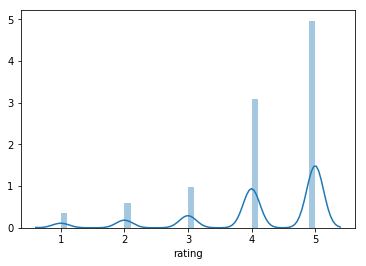

In [15]:
import seaborn as sns

sns.distplot(shops['rating']);

In [16]:
wc_bad = count(shops[shops['rating'] < 4]['tokens'])

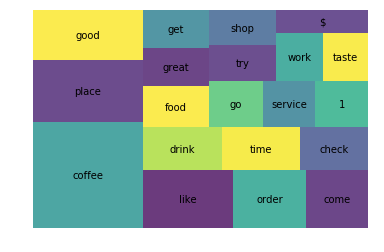

In [18]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8)
plt.axis('off')
plt.show()

In [22]:
wc_good = count(shops[shops['rating'] >= 4]['tokens'])

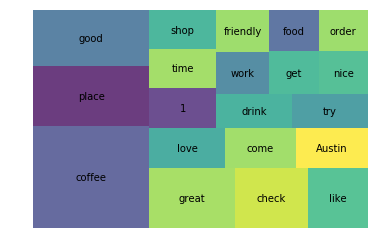

In [23]:
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8)
plt.axis('off')
plt.show()

In [25]:
wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']
diff = wc_good[['word', 'appears_in_pct']].merge(
    wc_bad[['word', 'appears_in_pct_bad']], how='outer')

In [26]:
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,coffee,0.637785,0.631436
1,place,0.508958,0.510840
2,good,0.480130,0.434959
3,great,0.406678,0.234417
4,check,0.437459,0.331301


In [27]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']

In [28]:
diff.sort_values(by='diff')

,word,appears_in_pct,appears_in_pct_bad,diff
5,like,0.273127,0.403794,-0.130667
19,order,0.166287,0.292005,-0.125719
139,ask,0.050651,0.149051,-0.098400
36,service,0.138274,0.234417,-0.096144
209,bad,0.036645,0.128726,-0.092081
26,go,0.140228,0.228320,-0.088092
49,taste,0.106026,0.189702,-0.083676
87,$,0.064169,0.147696,-0.083527
161,customer,0.044788,0.126016,-0.081228
150,say,0.047231,0.126016,-0.078785


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

